# Zonal Mean Response: `precip`
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [36]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth, yticks2lat
import geoxarray

Tue May 22 17:19:04 EDT 2018


In [37]:
# parameters
data_names = ['precip', ]
figname = f'fig_zonalMean_{data_names[0]}.pdf'
prcp_scale = 3600 * 24

enso = dict(
    nino=[7,  9, 12, 15, 17, 20, 22, 24, 27, 30],
    nina=[2,  6,  8, 13, 14, 18, 21, 25, 28, 29],
    neut=[1, 3, 4, 5, 10, 11, 16, 19, 23, 26]
)

### Agung data

In [38]:
# Agung data
daas_agung = dict()
for data_name in data_names[0:1]:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_agung import open_data as get_volcano
    volcano_name = 'Agung'
    year_volcano = 1963
    ens = range(1,31)
    nbname = 'volcano_impact_on_climate_agung.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        # ITCZ lat
        da = da_ctl.mean(['lon', 'en'])
        lat_itcz_agung = da.lat[da.argmax('lat')]
    
    for key in enso.keys():
        da = daa.mean('lon').sel(en=enso[key]) # zonal mean
        tt, pp = ttest_1samp(da, 0)
        da = da.mean('en').load()
        pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in list(da.dims)])
        

        daas_agung[key] = dict()
        daas_agung[key]['da'] = da
        daas_agung[key]['pvalue'] = pvalue
        
         # ITCZ lat
        da = da_ctl.sel(en=enso[key]).mean(['lon', 'en'])
        lat_itcz_agung = da.lat[da.argmax('lat')]
        daas_agung[key]['lat_itcz'] = lat_itcz_agung


Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.nc


### StMaria data

In [39]:
# St Maria data
daas_stmaria = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_stmaria import open_data as get_volcano
    volcano_name = 'StMaria'
    year_volcano = 1902
    ens = range(1,30+1)
    nbname = 'volcano_impact_on_climate_stmaria.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        # ITCZ lat
        da = da_ctl.mean(['lon', 'en'])
        lat_itcz_stmaria = da.lat[da.argmax('lat')]
    
    for key in enso.keys():
        da = daa.mean('lon').sel(en=enso[key]) # zonal mean
        tt, pp = ttest_1samp(da, 0)
        da = da.mean('en').load()
        pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in list(da.dims)])

        daas_stmaria[key] = dict()
        daas_stmaria[key]['da'] = da
        daas_stmaria[key]['pvalue'] = pvalue
        
         # ITCZ lat
        da = da_ctl.sel(en=enso[key]).mean(['lon', 'en'])
        lat_itcz_agung = da.lat[da.argmax('lat')]
        daas_stmaria[key]['lat_itcz'] = lat_itcz_agung
        
    

Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.nc


### Plot

<IPython.core.display.Javascript object>


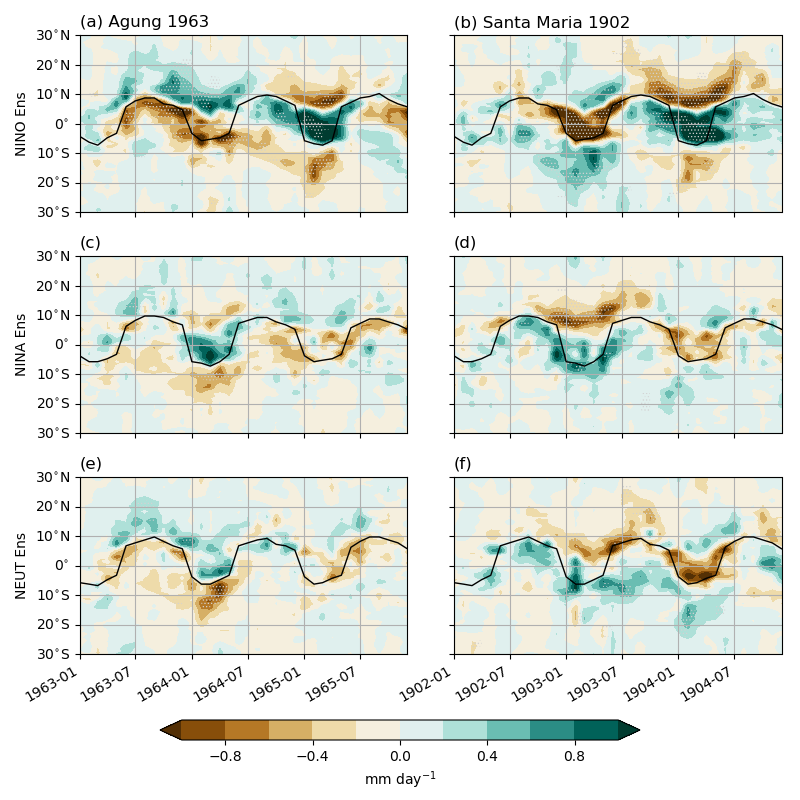

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [40]:
# plot
rcParams['hatch.color'] = 'lightgray'
hatch_pattern = ['.....']
fill_alpha = 0.2
yticks = range(-90, 91, 30)
levels = np.arange(-1,1+.001,.2)
# levels = 10
add_colorbar = False
colormap = 'BrBG'

fig, axes = plt.subplots(3,2,figsize=(8,8), sharey=True, sharex='col')
# ############
plt.sca(axes[0,0])

s = 'nino'
da = daas_agung[s]['da'] # 
pvalue = daas_agung[s]['pvalue']
da.rename('').plot.contourf(x='time', y='lat', extend='both',
                             levels=levels, add_colorbar=add_colorbar, cmap=colormap,
                             robust=True, center=0)
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)
daas_agung[s]['lat_itcz'].plot(color='k', lw=1)

xticksmonth(range(1,13,6))
plt.title('(a) Agung 1963', loc='left')
plt.ylabel(f'{s.upper()} Ens')
plt.grid(True)
yticks2lat(yticks)
plt.xlabel('')

# ##########
plt.sca(axes[0,1])

da = daas_stmaria[s]['da'] # 
pvalue = daas_stmaria[s]['pvalue']
da.rename('').plot.contourf(x='time', y='lat', extend='both',
#                              levels=10, 
                             levels=levels, add_colorbar=add_colorbar, cmap=colormap,
                             robust=True, center=0)
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)
daas_stmaria[s]['lat_itcz'].plot(color='k', lw=1)

xticksmonth(range(1,13,6))
plt.title('(b) Santa Maria 1902', loc='left')
plt.grid(True)
plt.ylabel('')
plt.xlabel('')

# ############
plt.sca(axes[1,0])

s = 'nina'
da = daas_agung[s]['da'] # 
pvalue = daas_agung[s]['pvalue']
da.rename('').plot.contourf(x='time', y='lat',  extend='both',
#                              levels=10, 
                             levels=levels, add_colorbar=add_colorbar, cmap=colormap,
                             robust=True, center=0)
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)
daas_agung[s]['lat_itcz'].plot(color='k', lw=1)

xticksmonth(range(1,13,6))
plt.title('(c)', loc='left')
plt.ylabel(f'{s.upper()} Ens')
plt.grid(True)
yticks2lat(yticks)
plt.xlabel('')

# ##########
plt.sca(axes[1,1])

da = daas_stmaria[s]['da'] # 
pvalue = daas_stmaria[s]['pvalue']
da.rename('').plot.contourf(x='time', y='lat', extend='both',
#                              levels=10, 
                             levels=levels, add_colorbar=add_colorbar, cmap=colormap,
                             robust=True, center=0)
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)
daas_stmaria[s]['lat_itcz'].plot(color='k', lw=1)

xticksmonth(range(1,13,6))
plt.title('(d)', loc='left')
plt.grid(True)
plt.ylabel('')
plt.xlabel('')

# ############
plt.sca(axes[2,0])

s = 'neut'
da = daas_agung[s]['da'] # 
pvalue = daas_agung[s]['pvalue']
da.rename('').plot.contourf(x='time', y='lat',  extend='both',
#                              levels=10, 
                             levels=levels, add_colorbar=add_colorbar, cmap=colormap,
                             robust=True, center=0)
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)
daas_agung[s]['lat_itcz'].plot(color='k', lw=1)

xticksmonth(range(1,13,6))
plt.title('(e)', loc='left')
plt.ylabel(f'{s.upper()} Ens')
plt.grid(True)
yticks2lat(np.arange(-30,30+1,10))
plt.ylim(-30,30)
plt.xlabel('')

# ##########
plt.sca(axes[2,1])

da = daas_stmaria[s]['da'] # 
pvalue = daas_stmaria[s]['pvalue']
im = da.rename('').plot.contourf(x='time', y='lat', extend='both',
#                              levels=10, 
                             levels=levels, add_colorbar=add_colorbar, cmap=colormap,
                             robust=True, center=0)
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=hatch_pattern, add_colorbar=False, add_labels=False)
daas_stmaria[s]['lat_itcz'].plot(color='k', lw=1)

xticksmonth(range(1,13,6))
plt.title('(f)', loc='left')
plt.grid(True)
plt.ylabel('')
plt.xlabel('')

# colorbar
# ax = plt.axes((.925,.2,.025,.6))
ax = plt.axes((.2,.075,.6,.025))
cbar = plt.colorbar(im, cax=ax, orientation='horizontal')
# cbar.ax.yaxis.set_label_position('right')
cbar.ax.set_xlabel('mm day$^{-1}$')

plt.tight_layout(rect=[0,.1,1,1], w_pad=-1)
plt.savefig(figname)